# Graded: 20 of 20 correct
1. Part 1
- [x] Create 1000 x 1000 matrix
- [x] Row sum
- [x] Column sum
- [x] Time sums
- [x] Loop row sum
- [x] Loop col sum
- [x] Time loop sums
- [x] Compare numpy to loop

2. Part 2
- [x] X array
- [x] Y array
- [x] Print out vehicle count
- [x] Train test split
- [x] Y test/train histograms
- [x] Linear regression fit
- [x] Print the regression coefficients
- [x] Print the mean squared error
- [x] Print R^2
- [x] Correct scatterplots
- [x] Correct layout
- [x] Axes/labels

Comments: 


##### <img src="../SDSS-Logo.png" style="display:inline; width:500px" />


# The objective of this programming exercise is two-fold:
* To run an example that shows the computational efficiency of the Numpy numerical library;
* Get experience with scikit-learn by building a predictive model from data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

## Part 1
### For this part, you are going to compare the time it takes to compute row sums and column sums for a large matrix using Numpy functions vs for loops.

#### Numpy method
* Create a large matrix of size `(1000 X 1000)` of random values.
* Use the Numpy `np.sum()` method to calculate the row sums and column sums of this matrix.
* Track the amount of time it took to calculate the row sum and the column sum.
    * You can use the `time.time()` function to track time.

In [2]:
m1k = np.random.randint(0,10, (1000,1000))

In [3]:
def sum_col_row_np(np_matrix):
	time_begin = time.time()
	sum_col = np.sum(np_matrix, 0)
	sum_row = np.sum(np_matrix, 1)
	time_end = time.time()
	return time_end-time_begin

print(f"""Processing time to sum col and row: {sum_col_row_np(m1k)} s""")

Processing time to sum col and row: 0.00099945068359375 s


#### for loop method
* Now use `for` loops to compute the row sums and columns sums for the same matrix.
* Again, track the time using the `time.time()` function

In [4]:
def sum_col_row_loop(loop_matrix):
	loop_begin = time.time()
	sum_loop_row = np.zeros(loop_matrix.shape[0])
	sum_loop_col = np.zeros(loop_matrix.shape[1])
	for i in range(loop_matrix.shape[0]): # get row count
		for j in range(loop_matrix.shape[1]): # get col count
			sum_loop_row[i] += loop_matrix[i][j]
			sum_loop_col[j] += loop_matrix[i][j]        
	loop_end = time.time()

	return loop_end-loop_begin

print(f"""Processing time to sum col and row: {sum_col_row_loop(m1k)} s""")

Processing time to sum col and row: 0.519202709197998 s


#### Compare the time taken by the two methods.
* What is your conclusion?
* Try other array computations and compare the difference.

Using loop iteration is known as inefficient because we iterate the element one by one and it consumes memory back and forth fetching the value and do whatever processing we write. While using Numpy sum, the function is already written and optimized for vectorized operations.

In [5]:
m5k = np.random.randint(0, 10, (5000, 5000))

print(f"""Processing time to sum col and row Np.sum : {sum_col_row_np(m5k)} s""")
print(f"""Processing time to sum col and row loop	: {sum_col_row_loop(m5k)} s""")

Processing time to sum col and row Np.sum : 0.029769420623779297 s
Processing time to sum col and row loop	: 13.25946593284607 s


## Part 2
## For this part, you will create a predictive model using scikit-learn to predict vehicle MPG from vehicle characteristic data.
* The data for this part is from [EPA fuel ecomony](https://www.fueleconomy.gov/) website.
* For the purpose of this programming exercise, we have downloaded this data and modified it to create a reasonably clean analytical data set.
* The data set includes the model years 2020-2023.

### Load the vehicles data set for 2020-2023.
* The data is in the CSV file `carDataMPG2023.csv`
* The code below uses the pandas `read_csv()` function to read the data into a pandas data frame.
    * You will learn about pandas and data frame in the next unit, but here we are using it here to simplify the setting up of the problem.

In [6]:
# Read the car MPG data
carDataRead = pd.read_csv("carDataMPG2023.csv")
carDataRead #.head(10)

,id,make,model,year,fuelType1,drive,trany,VClass,cylinders,displ,speeds,drive_number,avgMpg
0,41213,Toyota,Corolla,2020,Regular Gasoline,Front-Wheel Drive,Automatic (AV-S10),Compact Cars,4.0,2.0,10.0,2,46.31000
1,41215,Toyota,Corolla,2020,Regular Gasoline,Front-Wheel Drive,Manual 6-spd,Compact Cars,4.0,2.0,6.0,2,42.54910
2,41216,Toyota,Corolla XSE,2020,Regular Gasoline,Front-Wheel Drive,Automatic (AV-S10),Compact Cars,4.0,2.0,10.0,2,45.39342
3,41218,Toyota,Corolla,2020,Regular Gasoline,Front-Wheel Drive,Manual 6-spd,Compact Cars,4.0,1.8,6.0,2,44.54000
4,41222,Kia,Soul,2020,Regular Gasoline,Front-Wheel Drive,Manual 6-spd,Small Station Wagons,4.0,2.0,6.0,2,35.47000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,47517,Mitsubishi,Outlander Sport 2WD,2023,Regular Gasoline,Front-Wheel Drive,Automatic (AV-S6),Small Sport Utility Vehicle 2WD,4.0,2.4,6.0,2,33.59417
4532,47518,Mercedes-Benz,GLC300 4matic,2023,Premium Gasoline,All-Wheel Drive,Automatic 9-spd,Small Sport Utility Vehicle 4WD,4.0,2.0,9.0,4,34.07000
4533,47519,Toyota,Corolla Cross Hybrid AWD,2023,Regular Gasoline,All-Wheel Drive,Automatic (AV-S6),Small Sport Utility Vehicle 4WD,4.0,2.0,6.0,4,64.02492
4534,47520,INEOS Automotive,Grenadier,2023,Premium Gasoline,4-Wheel Drive,Automatic (S8),Standard Sport Utility Vehicle 4WD,6.0,3.0,8.0,4,19.75000


### Next create Numpy arrays of the predictor and target variables.
* The predictor variables will be the columns `cylinders`, `displ`, `speeds` and `drive_number`
    * Call the array of predictor variables X
* The target variable will be the column `avgMpg`
    * Call the array of target variable Y
* The Numpy `np.array()` function can convert a homogeneous section of a data frame to a Numpy array.

In [7]:
X = carDataRead[['cylinders', 'displ', 'speeds', 'drive_number']]

In [8]:
X

,cylinders,displ,speeds,drive_number
0,4.0,2.0,10.0,2
1,4.0,2.0,6.0,2
2,4.0,2.0,10.0,2
3,4.0,1.8,6.0,2
4,4.0,2.0,6.0,2
...,...,...,...,...
4531,4.0,2.4,6.0,2
4532,4.0,2.0,9.0,4
4533,4.0,2.0,6.0,4
4534,6.0,3.0,8.0,4


In [9]:
y = carDataRead["avgMpg"]
y

0       46.31000
1       42.54910
2       45.39342
3       44.54000
4       35.47000
          ...   
4531    33.59417
4532    34.07000
4533    64.02492
4534    19.75000
4535    18.45000
Name: avgMpg, Length: 4536, dtype: float64

### Print out the number of vehicles in the dataset

In [10]:
print(f"number of vehicles in the dataset: {len(carDataRead)}")

number of vehicles in the dataset: 4536


### Split the X and Y arrays into training and testing datasets using `train_test_split()`.
* Keep 80% of the data for training and 20% for testing. 
* Call the training and testing splits `X_train`, `Y_train`, `X_test` and `Y_test`.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3628, 4) (908, 4) (3628,) (908,)


### Plot the histograms of `Y_test` and `Y_train` to make sure they are comparable.
* With a large dataset of this size, this is less of a problem than with small data set.
* Nonetheless  it is worth checking that the training-test split has not biased one of these subsets in one way or another.

In [13]:
from sklearn.preprocessing import MinMaxScaler

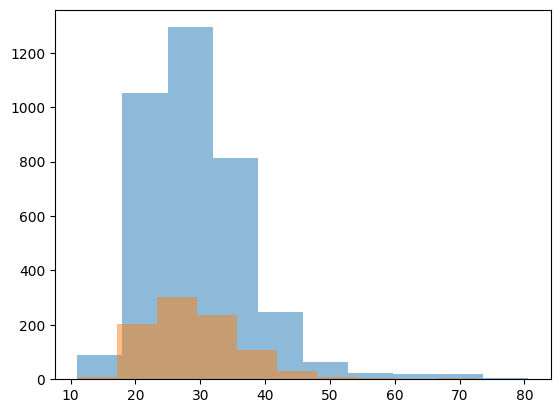

In [14]:
plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

##### I'm not sure if it's what being asked. What I see from both histogram the trend is quite similar

### Linear regression fit
* Use the `LinearRegression` model in scikit learn to fit a regression model with `X_train` as the predictor variable and `Y_train` as the target.
* Use the `predict()` method from the fitted model to predict `avgMpg` from `X_test`, and call the predicted value `Y_pred`.

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [16]:
Y_pred = regr.predict(X_test)
Y_pred

array([39.19231657, 33.25365188, 31.66597195, 21.97479067, 31.24291009,
       38.47642102, 12.98193248, 35.77702818, 19.45141437, 33.96401448,
       22.31201887, 35.29911614, 28.45768358, 21.26442807, 37.59004188,
       34.16015873, 28.03462172, 28.52338954, 33.25365188, 20.579516  ,
       34.16015873, 33.25365188, 29.42989639, 30.7594651 , 33.25365188,
       35.77702818, 28.98670682, 29.14259565, 34.87052133, 32.14567795,
       27.32958195, 38.69801581, 34.87052133, 29.65149118, 34.89064904,
       32.34714503, 22.33214658, 35.77702818,  4.05478025, 35.77702818,
       38.69801581, 28.2360888 , 36.68353503, 22.33214658, 35.76243342,
       33.25365188, 34.66905426, 35.77702818, 23.78780437, 32.14567795,
       34.3616258 , 37.59004188, 22.31201887, 35.77702818, 25.31510117,
       26.90652009, 22.33214658, 30.55799803, 27.32958195, 36.48206796,
       33.96401448, 33.25365188, 25.31510117, 32.36727274, 29.85295825,
       33.49537437, 33.25365188, 28.2360888 , 22.33214658, 37.59

### Outputs
* Print the regression coefficients
* Print the mean squared error between `Y_test` and `Y_pred`
* Print the R^2, called the [coefficient of determination,](https://en.wikipedia.org/wiki/Coefficient_of_determination) between `Y_test` and `Y_pred`

In [17]:
print(f"y = {regr.coef_[0]} * x + {regr.intercept_}")

y = -1.4008076133504177 * x + 55.58758544344009


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean sq err: {mean_squared_error(y_test, Y_pred)}\nR2 Score: {r2_score(y_test, Y_pred)}")


Mean sq err: 27.395100517243637
R2 Score: 0.5660893790590537


### Scatter plots
* Create scatter plots of `Y_test` and `Y_pred` against each of the 4 predictor variables `cylinders`, `displ`, `speeds`, `drive_number`.
* Do this as subplots in a 2 X 2 grid. 
* Label the subplots appropriately.
* Include axis labels also.

In [19]:
y_test = y_test.to_numpy().reshape(-1,1)
Y_pred = Y_pred[:, np.newaxis]
print(y_test, Y_pred)

[[38.08853]
 [30.12   ]
 [25.76   ]
 [21.6128 ]
 [22.09   ]
 [72.65   ]
 [12.68109]
 [36.29   ]
 [21.14   ]
 [32.83   ]
 [19.97   ]
 [37.13816]
 [28.05   ]
 [17.89663]
 [29.61   ]
 [36.1578 ]
 [29.46584]
 [27.05   ]
 [35.77711]
 [19.71548]
 [32.11   ]
 [33.89   ]
 [26.31   ]
 [23.74588]
 [33.18269]
 [35.001  ]
 [29.     ]
 [31.99556]
 [31.45   ]
 [39.56434]
 [30.73   ]
 [38.17   ]
 [27.65   ]
 [30.71   ]
 [34.46978]
 [30.80427]
 [21.63437]
 [32.57667]
 [12.74   ]
 [34.39   ]
 [35.71226]
 [29.46924]
 [42.6    ]
 [21.63437]
 [33.81049]
 [33.62915]
 [40.17372]
 [27.58449]
 [18.66018]
 [39.88679]
 [34.10854]
 [38.38   ]
 [21.11953]
 [31.57275]
 [23.27539]
 [26.06   ]
 [24.80832]
 [31.94484]
 [24.7    ]
 [59.90363]
 [45.39   ]
 [34.13   ]
 [23.83226]
 [33.67   ]
 [29.24   ]
 [27.10305]
 [29.87   ]
 [29.40799]
 [22.86174]
 [33.07378]
 [27.18   ]
 [23.02306]
 [30.94   ]
 [23.30291]
 [19.98   ]
 [25.11   ]
 [29.56   ]
 [29.41195]
 [26.11   ]
 [27.4    ]
 [47.24   ]
 [26.79   ]
 [39.41   ]
 [71

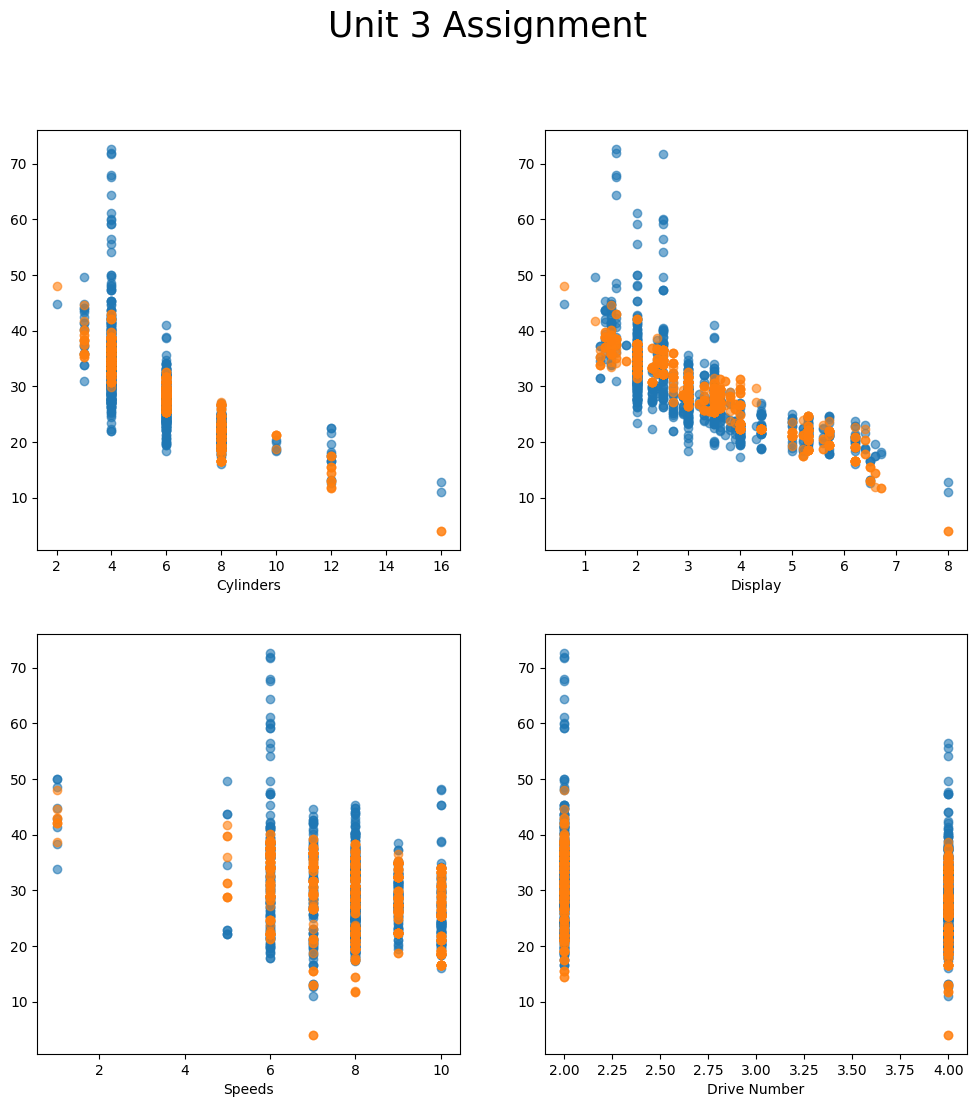

In [22]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 12))
gs = GridSpec(2, 2, figure=fig, wspace=0.2, hspace=0.2)
fig.suptitle("Unit 3 Assignment", fontsize=25)

row1A = fig.add_subplot(gs[0, 0])
row1A.scatter(X_test["cylinders"], y_test, label="test", alpha=0.6)
row1A.scatter(X_test["cylinders"], Y_pred, label="pred", alpha=0.6)
row1A.set_xlabel("Cylinders")

row1B = fig.add_subplot(gs[0, 1])
row1B.scatter(X_test["displ"], y_test, label="test", alpha=0.6)
row1B.scatter(X_test["displ"], Y_pred, label="pred", alpha=0.6)
row1B.set_xlabel("Display")

row2A = fig.add_subplot(gs[1, 0])
row2A.scatter(X_test["speeds"], y_test, label="test", alpha=0.6)
row2A.scatter(X_test["speeds"], Y_pred, label="pred", alpha=0.6)
row2A.set_xlabel("Speeds")


row2B = fig.add_subplot(gs[1, 1])
row2B.scatter(X_test["drive_number"], y_test, label="test", alpha=0.6)
row2B.scatter(X_test["drive_number"], Y_pred, label="pred", alpha=0.6)
row2B.set_xlabel("Drive Number")


plt.show()